<a href="https://colab.research.google.com/github/bikramCB/St-Gerogie-Detection/blob/main/YoloV8_St_Georgie_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [4]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on 18.01.2023 with version YOLOv8.0.9.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an issue on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [5]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/107.7 GB disk)


In [6]:
from ultralytics import YOLO

from IPython.display import display, Image

## Custom Training

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
%cd /content/drive/MyDrive/Classess

/content/drive/MyDrive/Classess


In [9]:
!ls

 data.yaml  'St_George Detection.v1i.yolov5pytorch'   YoloV5.ipynb


In [10]:
%cd /content/drive/MyDrive/Classess
!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=35 imgsz=224 plots=True

/content/drive/MyDrive/Classess
100% 21.5M/21.5M [00:00<00:00, 106MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=35, patience=50, batch=16, imgsz=224, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, d

In [11]:
!ls runs/detect/train/

args.yaml					    R_curve.png		train_batch102.jpg
confusion_matrix.png				    results.csv		train_batch1.jpg
events.out.tfevents.1719745094.3743a229a3ca.9484.0  results.png		train_batch2.jpg
F1_curve.png					    train_batch0.jpg	val_batch0_labels.jpg
P_curve.png					    train_batch100.jpg	val_batch0_pred.jpg
PR_curve.png					    train_batch101.jpg	weights


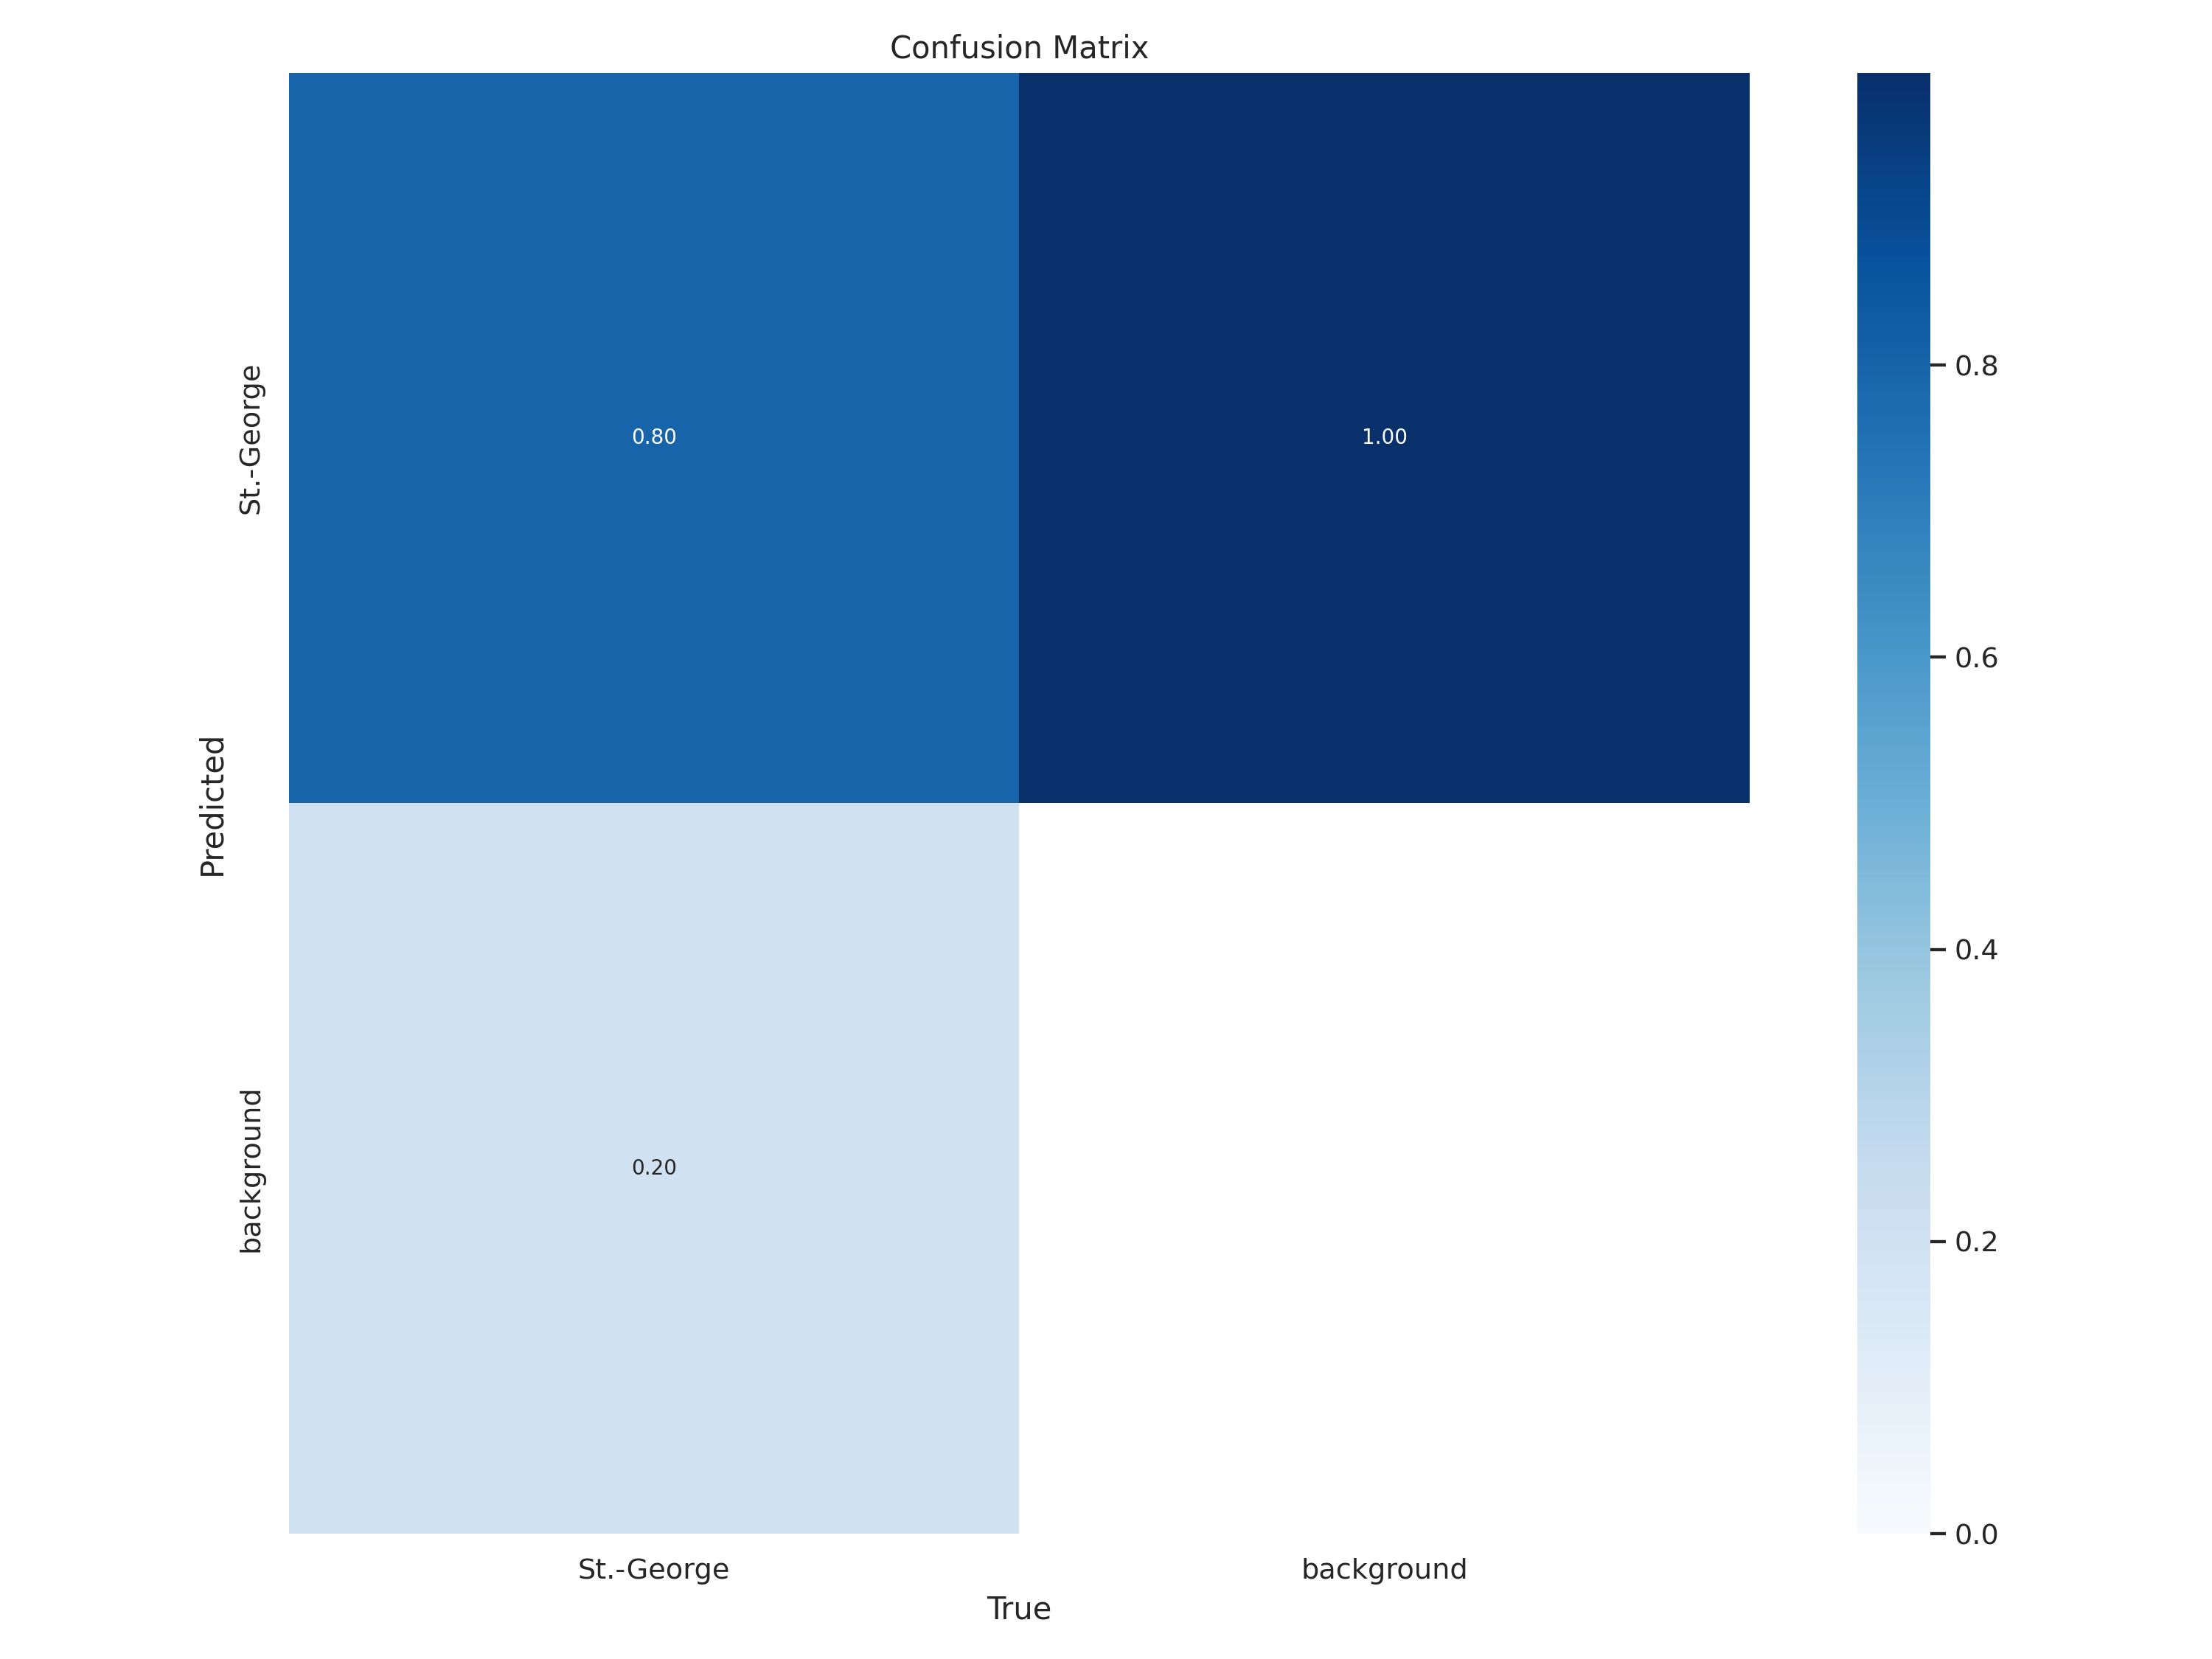

In [12]:
Image(filename='runs/detect/train/confusion_matrix.png', width=600)

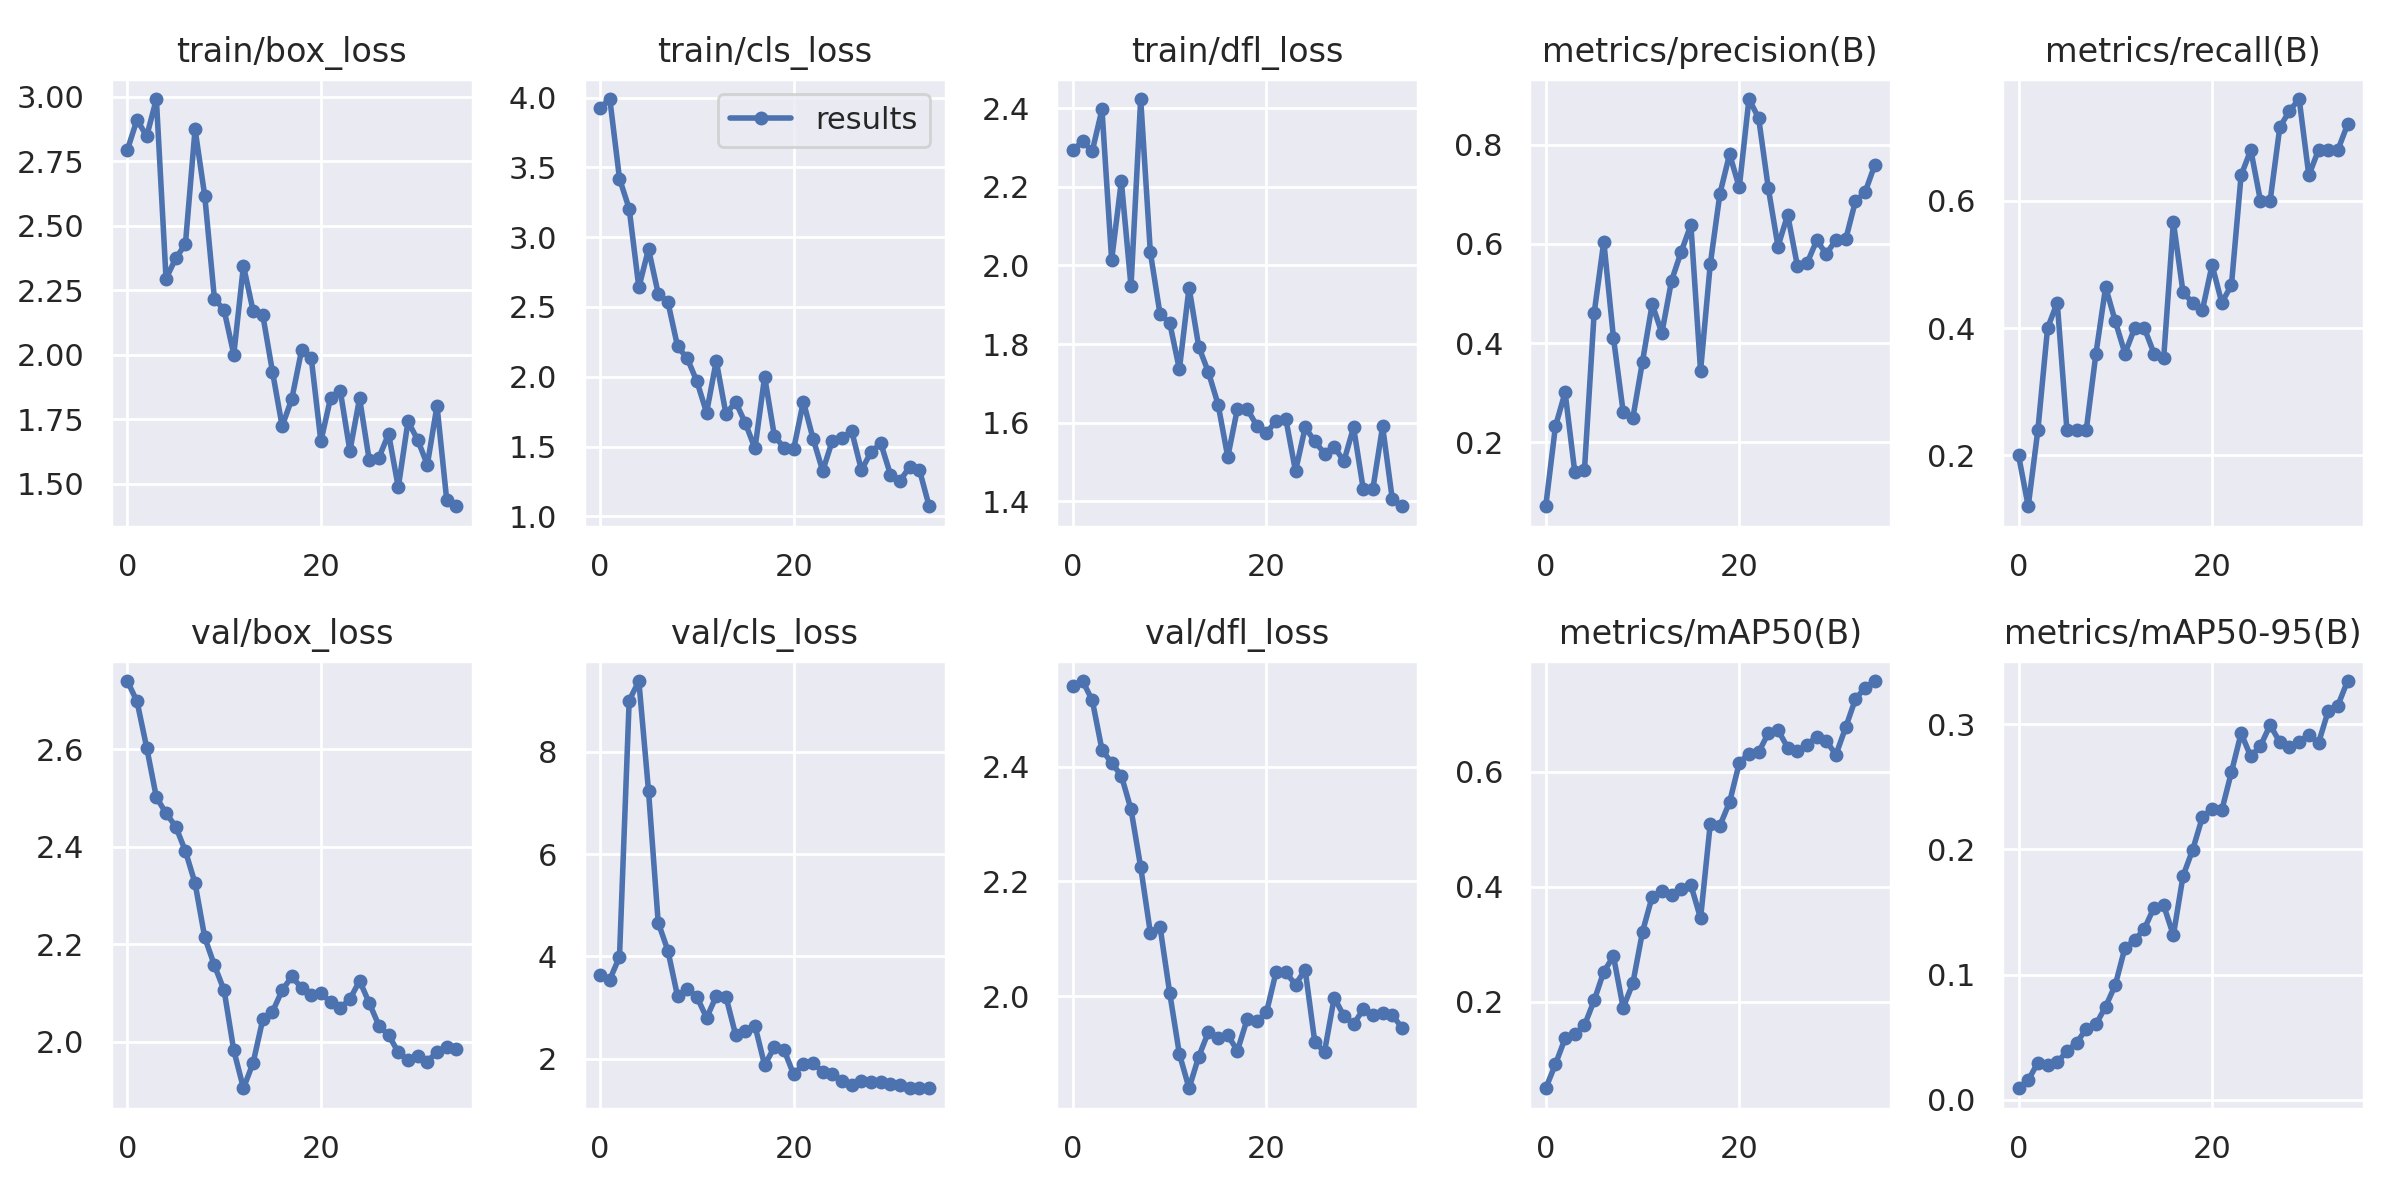

In [13]:
Image(filename='runs/detect/train/results.png', width=600)

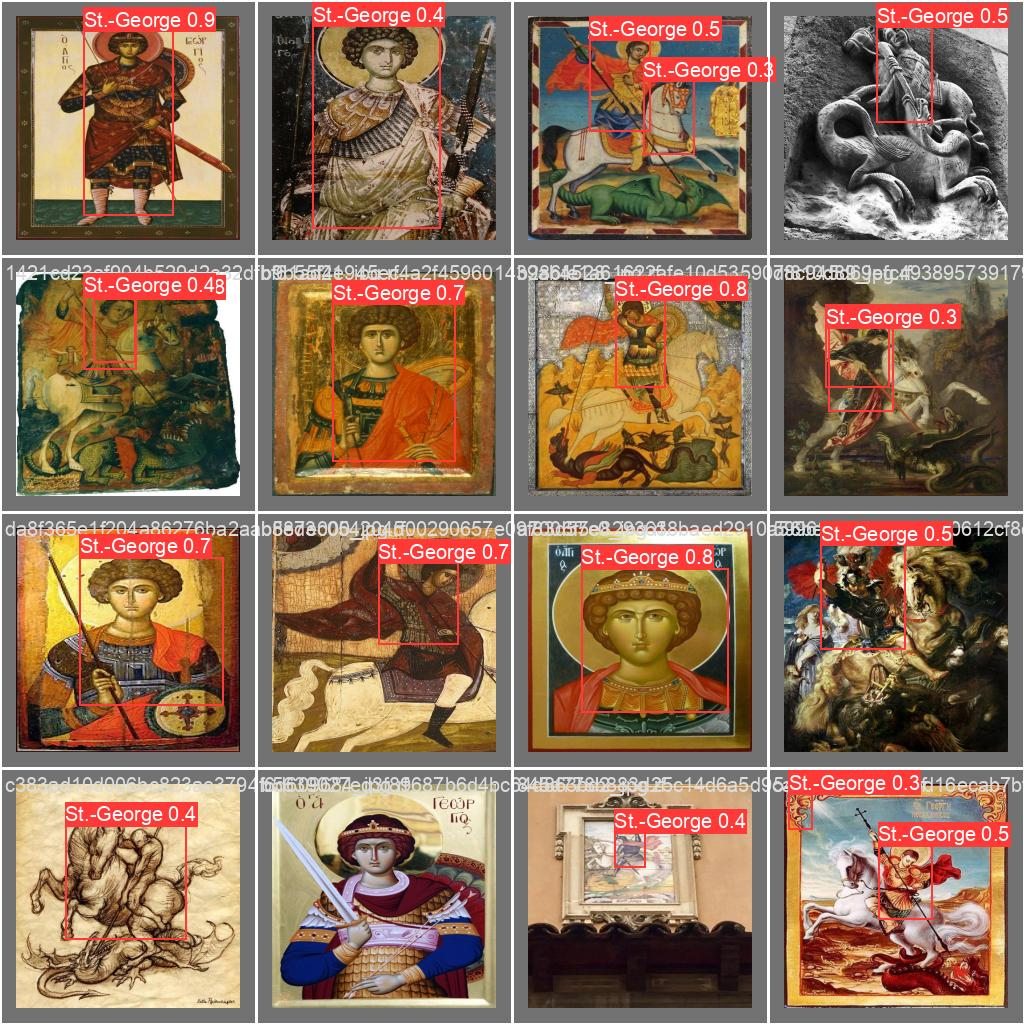

In [14]:
Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model (validation data)

In [15]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml

2024-06-30 11:17:38.074574: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-30 11:17:38.074635: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-30 11:17:38.076457: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-30 11:17:38.085616: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-30 11:17:40.725083: W tensorflow/compiler/tf2

## Inference with Custom Model (test data)

In [16]:
!yolo task=detect mode=predict model='runs/detect/train/weights/best.pt' conf=0.25 source='St_George Detection.v1i.yolov5pytorch/test/images'

2024-06-30 11:21:50.134360: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-30 11:21:50.134424: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-30 11:21:50.136685: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-30 11:21:50.148766: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-30 11:21:51.881631: W tensorflow/compiler/tf2

In [19]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Identifyting presense of ST. Georgie in an image (Image Url)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


St George is not present in the image.


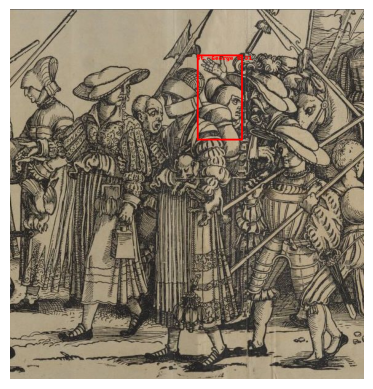

In [18]:
import torch
from ultralytics import YOLO
from PIL import Image as PILImage, ImageDraw
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# Load the trained model
model = YOLO('runs/detect/train/weights/best.pt')

# Function to classify image based on the presence of St George
def classify_image(image_url):
    # Download the image from the URL
    response = requests.get(image_url)
    image = PILImage.open(BytesIO(response.content))

    # Run inference
    results = model(image)

    # Extract predictions
    predictions = results[0].boxes.data  # predictions for the first image

    # Check for presence of "St George"
    class_names = model.names  # Get class names
    st_george_present = False

    # Draw the bounding boxes
    draw = ImageDraw.Draw(image)

    for prediction in predictions:
        # Extract the bounding box coordinates and class id
        x1, y1, x2, y2, conf, class_id = prediction
        class_id = int(class_id)  # class_id is the last element
        class_name = class_names[class_id]

        # Draw the bounding box and label
        draw.rectangle([x1, y1, x2, y2], outline='red', width=3)
        draw.text((x1, y1), f'{class_name} {conf:.2f}', fill='red')

        if class_name == 'St George':
            st_george_present = True

    # Display the result
    if st_george_present:
        print("St George is present in the image.")
    else:
        print("St George is not present in the image.")

    # Display the image with detections
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Example usage
image_url = 'https://i.pinimg.com/736x/78/63/a2/7863a2404af5741f6d9fdcb2e4ffad02.jpg'  # Replace with the URL of your image
classify_image(image_url)


## Identifyting presense of ST. Georgie in an image (Image Path)

In [ ]:
# import torch
# from ultralytics import YOLO
# from PIL import Image as PILImage
# import matplotlib.pyplot as plt

# # Load the trained model
# model = YOLO('runs/detect/train/weights/best.pt')

# # Function to classify image based on the presence of St George
# def classify_image(image_path):
#     # Load and preprocess the image
#     image = PILImage.open(image_path)

#     # Run inference
#     results = model(image)

#     # Extract predictions
#     predictions = results.pred[0]  # predictions for the first image

#     # Check for presence of "St George"
#     class_names = model.names  # Get class names
#     st_george_present = False

#     for prediction in predictions:
#         class_id = int(prediction[5])  # class_id is the 6th element
#         class_name = class_names[class_id]
#         if class_name == 'St George':
#             st_george_present = True
#             break

#     # Display the result
#     if st_george_present:
#         print("St George is present in the image.")
#     else:
#         print("St George is not present in the image.")

#     # Display the image with detections
#     results.show()
#     plt.imshow(image)
#     plt.axis('off')
#     plt.show()

# # Example usage
# image_path = 'path/to/your/image.jpg'  # Replace with the path to your image
# classify_image(image_path)


## Summarization :

* As we have received huge almost 2000 image datets of st Geore, so We only collected 91 images of St. George and mannualy annotated bounding boxes with coordinates, width and height with the help of Roboflow. (Because its not possible to annotated 2k images mannualy alone with limited time).

*  Make a seperate folder 'classes' on Google drive and put all annotated datasets of train(50 images), validation(25 images) and test(16 images) along with data.yaml file( it contains train, val data image path and number of classes and names) and mount it on google colab.

*   Install yoloV8 for detection of St Georgie in the image from ultralytics.YoloV8 is the latest version of yolo. And it is the fastest among all the version available for the object detection. It has very few parameters compared to other yolo version available.

*  keep all image sizes 224x224, run yolov8s (it has mape = 44.9, param = 11.2,speed = 128.4 ms) on train images for detecting St georgie with 35 epochs.During training YoloV8 perform some data augmentation technique inside.

*  Save the best weight of the trained model along with Precision , Recall, F1 , PR curve inside the run folder in G drive.

*   Run the save best weight trained model to the validation 25 images.
*  Run the save best weight trained model to the test 16 images with 25% confidence score. And it can successfully predict all the images.Keep confidence score low just because it can successfully predict more images.

* Last we write a code where we can put any image url or image path to predict
where it can detect presence of St  George or not. Like We experimented one image of non St George and it can predict it successfully.













## *Metrics*
*  After trained the yoloV8s model on the train images, we got very good Accuracy as we can see that frm the confusion matrix above of St Georgie TP = 80% and precision recall both around 80 % from all train images . And for validation images Precision and recall tends to 100%.

*  From the result images above we can see that Loss is getting reduced for all epochs proceed further. If we run near around 300 - 400 epochs for model training and if we train more than 1.5k annotated images, we can eventually get a excellent accuracy for this particular project, for time constraints here we are taking limite images as well as epochs.(possible improvements).
